<a href="https://colab.research.google.com/github/vedantrk/DAV-SEM6/blob/main/DAV_EXP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment - 3**

**Aim**: Multiple Linear Regression in Python

**Task to be performed** :
List the packages to be used for Simple Linear Regression in Python

Download the dataset from UCI Repository / Kaggle Dataset

-- Load data into Google Colab

-- Display the summary of the dataset

Check whether the data meets the assumptions

-- Normality : Check whether the dependent variable follows a normal distribution

-- Lineartiy : Check the relationship between the independent and dependent variable

Perform Linear Regression Analysis using the identified package

Visualize the results with a graph

Repeat the steps 2 to 5 using R libraries

Prepare a Colab Notebook with the Aim, Tasks performed, Program, Output, and Conclusion and upload the Notebook in your Github Repositiry.

Prepare a handwritten wrtieup with Aim, Theory and Conclusion.

**Program:**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/content/Dummy Data HSS.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [11]:
df=df.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [13]:
X = df[['TV', 'Radio']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
r_squared = model.score(X_test, y_test)
intercept = model.intercept_
coefficients = model.coef_

print(f"Coefficient of Determination (R^2): {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Coefficient of Determination (R^2): 0.9990114622140369
Intercept: -0.16490761858258907
Coefficients: [ 3.56337311 -0.00455632]


In [20]:
y_pred = model.predict(X_test)

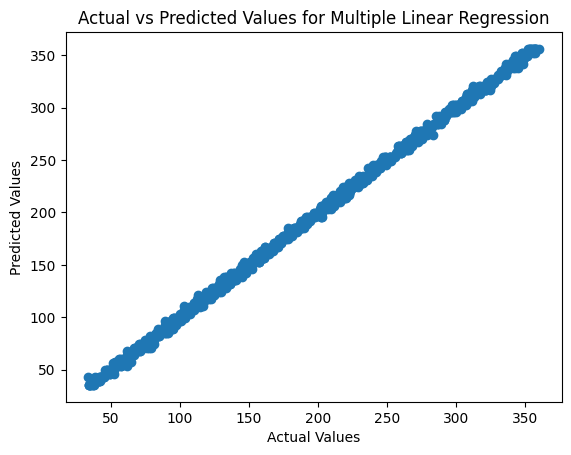

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Multiple Linear Regression")
plt.show()

R


In [4]:
my_data <- read.csv("/content/Dummy Data HSS.csv")
my_data <- na.omit(my_data)
head(my_data)

,TV,Radio,Social.Media,Influencer,Sales
,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,16,6.566231,2.907983,Mega,54.73276
2,13,9.237765,2.409567,Mega,46.67790
3,41,15.886446,2.913410,Mega,150.17783
4,83,30.020028,6.922304,Mega,298.24634
5,15,8.437408,1.405998,Micro,56.59418
6,29,9.614382,1.027163,Mega,105.88915


In [5]:
model <- lm(Sales ~ TV + Radio, data = my_data)

summary(model)


Call:
lm(formula = Sales ~ TV + Radio, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6178  -2.0018  -0.0075   2.0231  11.2751 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.129985   0.100857   -1.289    0.198    
TV           3.562571   0.003389 1051.231   <2e-16 ***
Radio       -0.003284   0.009155   -0.359    0.720    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.95 on 4543 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 2.258e+06 on 2 and 4543 DF,  p-value: < 2.2e-16


In [6]:
predictions <- predict(model, newdata = my_data)

mse <- mean((my_data$Sales - predictions)^2)

rmse <- sqrt(mse)

cat("Mean Squared Error:", mse, "\n")
cat("Root Mean Squared Error:", rmse, "\n")

Mean Squared Error: 8.693935 
Root Mean Squared Error: 2.948548 


In [8]:
coefficients <- coef(model)

cat("Intercept:", coefficients[1], "\n")
cat("TV Coefficient:", coefficients[2], "\n")
cat("Radio Coefficient:", coefficients[3], "\n")

Intercept: -0.1299848 
TV Coefficient: 3.562571 
Radio Coefficient: -0.003284394 


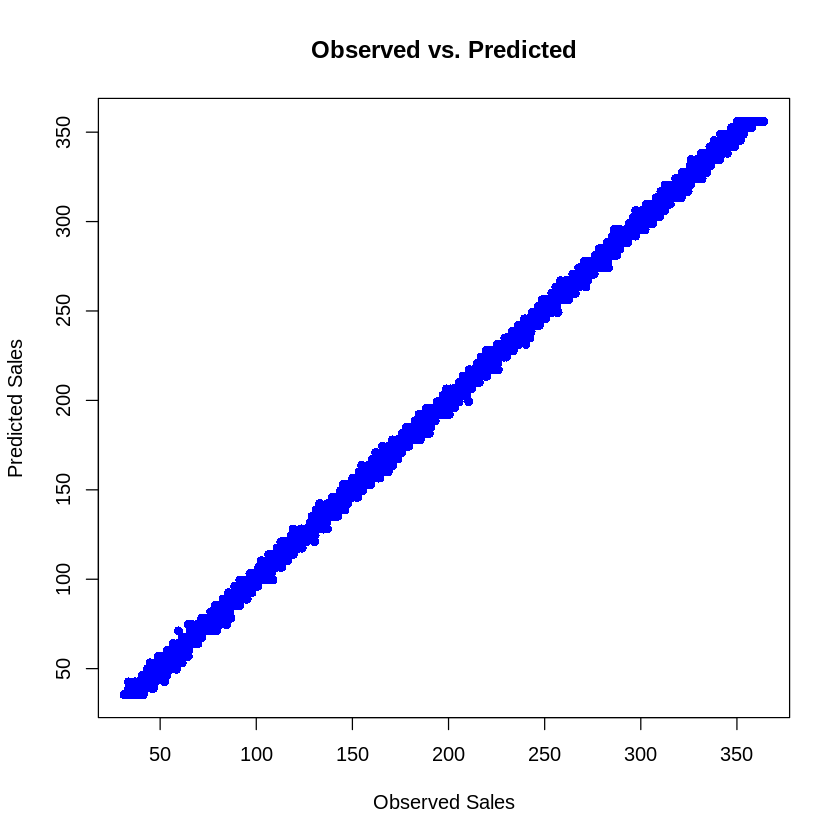

In [14]:
plot(my_data$Sales, predictions, main = "Observed vs. Predicted", xlab = "Observed Sales", ylab = "Predicted Sales", col = "blue", pch = 16)

**Conclusion :**

Understood the concept of Simple Linear Regression
Explored the packages in Python and R
Performed Simple Linear Regression using the Libraries in Python and R